In [1]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cluster import KMeans
import seaborn as sns

In [45]:
url = 'grade-to-campare-m-f.xlsx'
df=pd.read_excel(url)
df

,a,b,gender
0,23.28125,25.0000,male
1,14.21875,18.7500,male
2,14.21875,21.8750,male
3,14.21875,25.0000,male
4,23.28125,25.0000,male
5,23.28125,18.7500,male
6,14.21875,25.0000,male
7,0.00000,0.0000,male
8,23.28125,25.0000,male
9,10.00000,23.4375,male


In [1]:
df.a

NameError: name 'df' is not defined

In [55]:
X = df.a
y = df.b
gender = df.gender
gender.sample(5)

22    female
29    female
16    female
15    female
11    female
Name: gender, dtype: object

In [62]:
x = [df.a,df.b]
x

[0     23.28125
 1     14.21875
 2     14.21875
 3     14.21875
 4     23.28125
 5     23.28125
 6     14.21875
 7      0.00000
 8     23.28125
 9     10.00000
 10    15.93750
 11    15.93750
 12    15.93750
 13    15.93750
 14    15.93750
 15    15.93750
 16    15.93750
 17    15.93750
 18    16.56250
 19    16.56250
 20    16.56250
 21    16.56250
 22    13.75000
 23    13.75000
 24    13.75000
 25    10.00000
 26    10.00000
 27    14.68750
 28    14.68750
 29     8.75000
 30    14.68750
 31     8.75000
 32    11.25000
 33     8.75000
 34    11.25000
 35    11.25000
 36     8.75000
 37    14.68750
 Name: a, dtype: float64, 0     25.0000
 1     18.7500
 2     21.8750
 3     25.0000
 4     25.0000
 5     18.7500
 6     25.0000
 7      0.0000
 8     25.0000
 9     23.4375
 10    23.4375
 11    23.4375
 12    25.0000
 13    25.0000
 14    17.1875
 15    25.0000
 16    25.0000
 17    21.8750
 18    23.4375
 19    25.0000
 20    21.8750
 21    25.0000
 22    25.0000
 23    23.4375
 24    

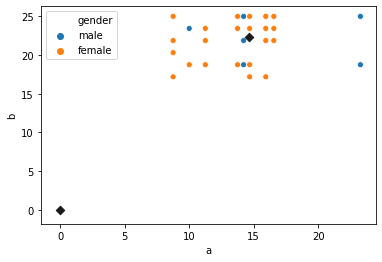

In [34]:
model=KMeans(n_clusters=2)
X=df[['a','b']]
model.fit(X)
model.cluster_centers_
sns.scatterplot(data=df, x='a', y='b', hue='gender')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='.1', marker='D')

In [57]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

Automatically created module for IPython interactive environment


ValueError: Length of `clusters_std` not consistent with number of centers. Got centers = [[0. 0.]
 [2. 2.]] and cluster_std = 0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
15    female
16    female
17    female
18    female
19    female
20    female
21    female
22    female
23    female
24    female
25    female
26    female
27    female
28    female
29    female
30    female
31    female
32    female
33    female
34    female
35    female
36    female
37    female
Name: gender, dtype: object

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
#                      np.linspace(-3, 3, 500))
# np.random.seed(0)
# X = np.random.randn(300, 2)
# Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[23.28125 14.21875 14.21875 14.21875 23.28125 23.28125 14.21875  0.
 23.28125 10.      15.9375  15.9375  15.9375  15.9375  15.9375  15.9375
 15.9375  15.9375  16.5625  16.5625  16.5625  16.5625  13.75    13.75
 13.75    10.      10.      14.6875  14.6875   8.75    14.6875   8.75
 11.25     8.75    11.25    11.25     8.75    14.6875 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Automatically created module for IPython interactive environment


TypeError: tuple indices must be integers or slices, not tuple

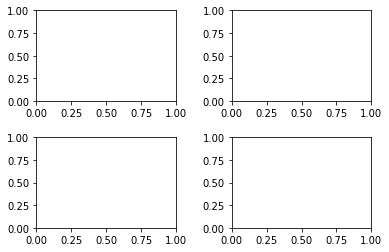

In [63]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
# iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target

X = df.a, df.b
y = gender

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)